# Discovering Fuzzy Frequent Spatial Pattern in Big Data Using FFSPMiner Algorithm

In this tutorial, we will discuss the first approach to find Fuzzy Frequent Spatial Pattern in big data using FFSPMiner algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Fuzzy Frequent Spatial Pattern using a single minimum support value


***

## <a id='basicApproach'>Basic approach: Executing FFSPMiner on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the FFSPMiner algorithm

In [1]:
from PAMI.fuzzyFrequentSpatialPattern.basic import FFSPMiner  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = https://u-aizu.ac.jp/~udayrage/datasets/fuzzyDatabases/Fuzzy_T10I4D100K.csv'

minimumSupportCount=100  #Users can also specify this constraint between 0 to 1.
neighborFile='fuzzy_T10I4D100K_neighbour.csv'
seperator=' '       

#### Step 3: Execute the FFSPMiner algorithm

In [3]:
obj = alg.FFSPMiner(iFile=inputFile, nFile=neighborFile, minSup=minimumSupportCount,sep=seperator)    #initialize
obj.startMine()            #Start the mining process

#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 797


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 7.619616985321045


##### Step 5.3: Total Memory consumed by the mining algorithm

In [9]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 457887744
Memory (USS): 419237888


# Advanced Tutorial on Implementing FFSPMiner Algorithm

In this tutorial, we will discuss the first approach to find Fuzzy Frequent Spatial Pattern in big data using FFSPMiner algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Fuzzy Frequent Spatial Pattern using multiple minimum support values.

***

#### In this tutorial, we explain how the FFSPMiner algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the FFSPMiner algorithm and pandas data frame

In [1]:
from PAMI.fuzzyFrequentSpatialPattern.basic import FFSPMiner  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = https://u-aizu.ac.jp/~udayrage/datasets/fuzzyDatabases/Fuzzy_T10I4D100K.csv'

minimumSupportCountList=[100,150,200,250,300]  #Users can also specify this constraint between 0 to 1.
seperator=' '
neighborFile='fuzzy_T10I4D100K_neighbour.csv'
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FFSPMiner algorithm

#### Step 3: Execute the FFSPMiner algorithm using a for loop

In [3]:
algorithm = 'FFSPMiner'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.FFSPMiner(iFile=inputFile,nFile=neighborFile, minSup=minSupCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


In [4]:
print(result)

   algorithm  minSup  patterns   runtime     memory
0  FFSPMiner     100       797  7.506250  458518528
1  FFSPMiner     150       765  7.187267  458665984
2  FFSPMiner     200       740  6.880144  458027008
3  FFSPMiner     250       717  7.313266  457330688
4  FFSPMiner     300       690  7.239387  455999488


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

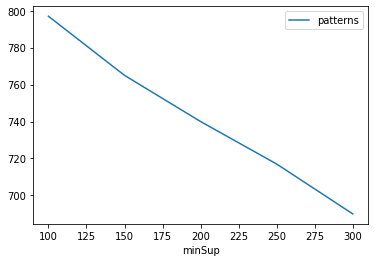

Graph for No Of Patterns is successfully generated!


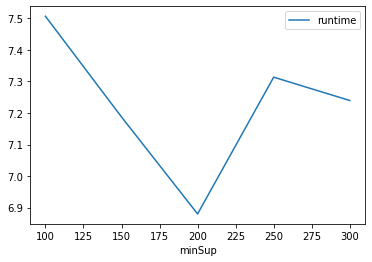

Graph for Runtime taken is successfully generated!


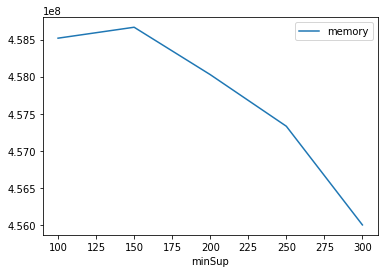

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
